In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import numpy as np
import itertools
import seaborn as sb
import keras
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint

%matplotlib inline


In [2]:
credit_df = pd.read_csv( "german-credit-card.txt", delim_whitespace = True, header = None)

In [3]:
credit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age',
           'inst_plans', 'housing', 'num_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [5]:
credit_df.columns = columns

In [6]:
credit_df = pd.get_dummies(credit_df, drop_first = True)
credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A12,checkin_acc_A13,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,2,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,2,0,0,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,0,0,1,1,0,1,0,0,0,0
996,30,3857,4,4,40,1,1,1,0,0,...,0,0,1,1,0,0,0,1,1,0
997,12,804,4,4,38,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
998,45,1845,4,4,23,1,1,2,0,0,...,1,0,1,0,1,0,1,0,1,0


In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int64
 1   amount                 1000 non-null   int64
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int64
 5   num_credits            1000 non-null   int64
 6   dependents             1000 non-null   int64
 7   status                 1000 non-null   int64
 8   checkin_acc_A12        1000 non-null   uint8
 9   checkin_acc_A13        1000 non-null   uint8
 10  checkin_acc_A14        1000 non-null   uint8
 11  credit_history_A31     1000 non-null   uint8
 12  credit_history_A32     1000 non-null   uint8
 13  credit_history_A33     1000 non-null   uint8
 14  credit_history_A34     1000 non-null   uint8
 15  purpose_A41            1000 non-null   

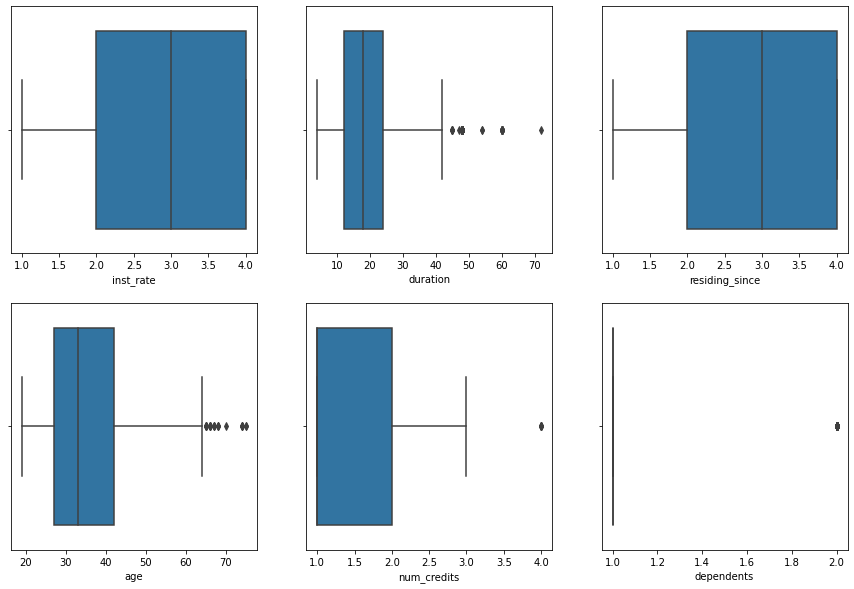

In [9]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In [10]:
credit_df = credit_df[credit_df.duration <= 43]
credit_df = credit_df[credit_df.age <= 55]
credit_df = credit_df[credit_df.dependents <= 1]
# X = X[X.duration <= 43]

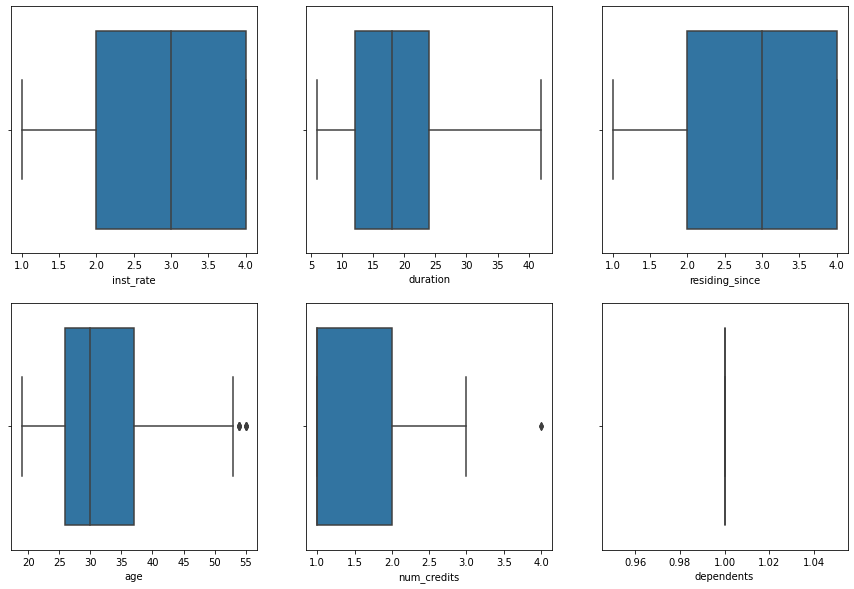

In [11]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In [12]:
corr_analysis = credit_df.corr()

In [13]:
sb.set(rc={"figure.figsize":(30,17)})

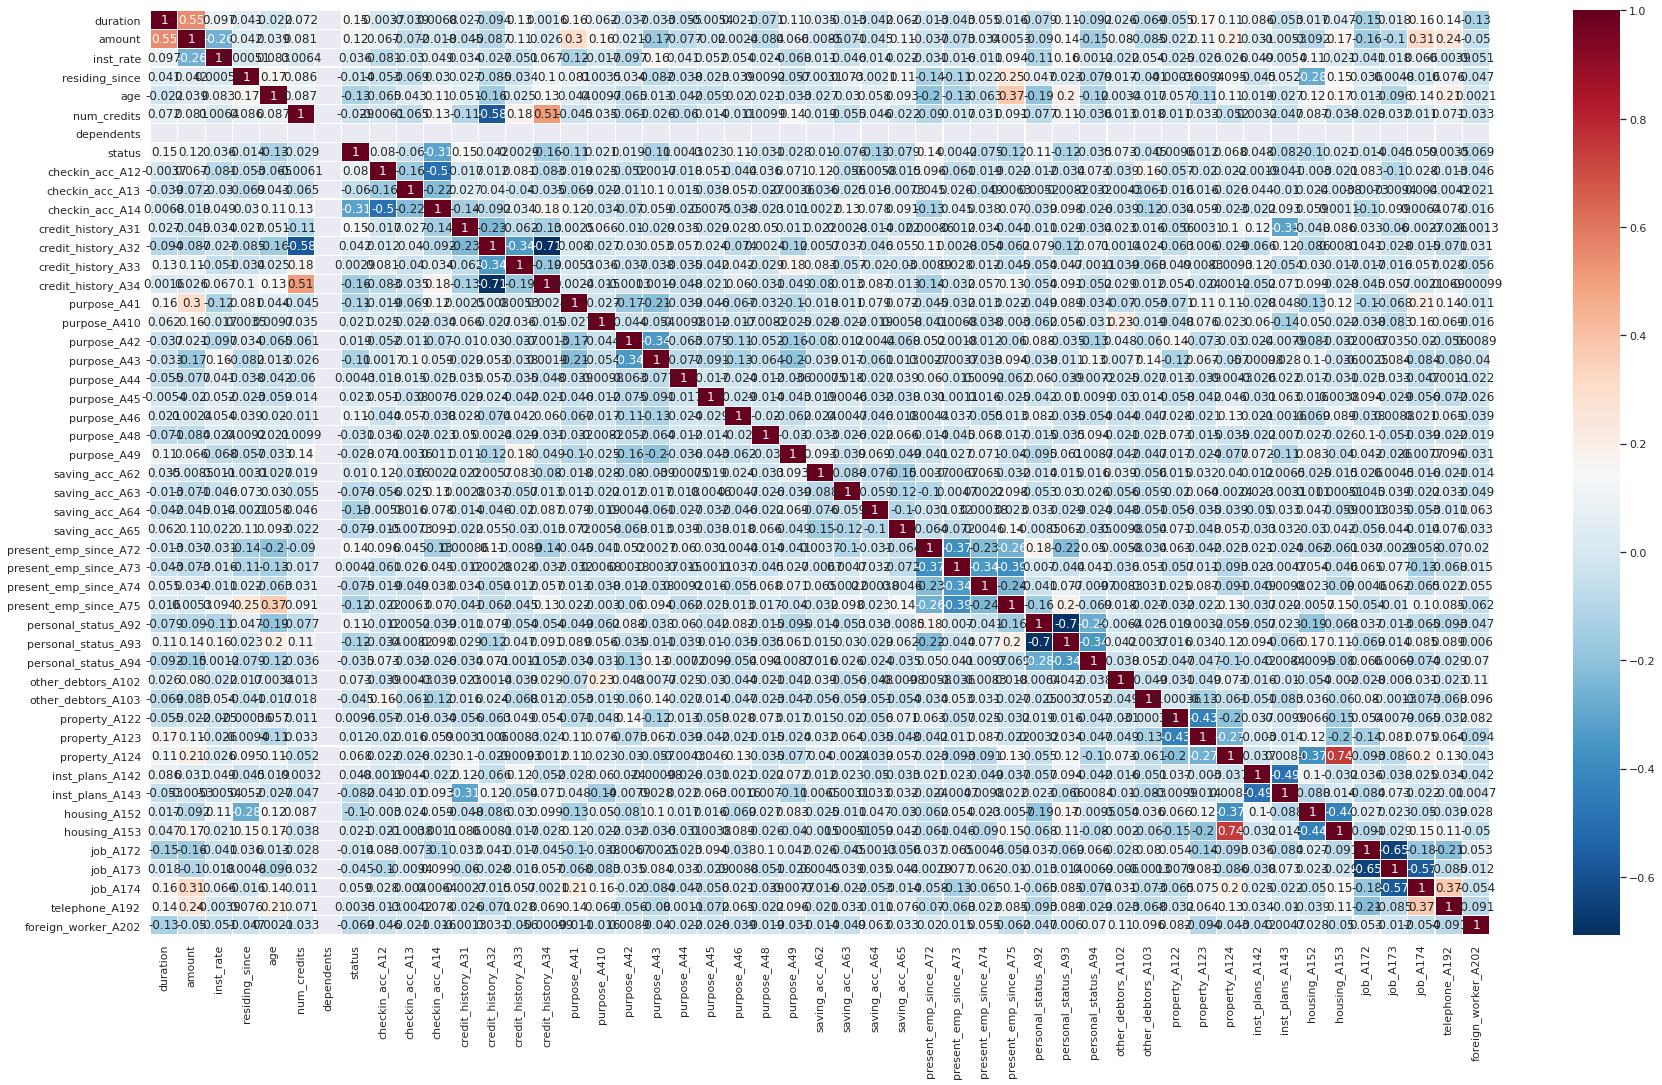

In [14]:
sb.heatmap(corr_analysis,
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

In [15]:
max_duration = np.amax(credit_df["duration"])
max_amount = np.amax(credit_df["amount"])
max_inst_rate = np.amax(credit_df["inst_rate"])
max_residing_since = np.amax(credit_df["residing_since"])
max_dependents = np.amax(credit_df["dependents"])
max_age = np.amax(credit_df["age"])
max_num_credits = np.amax(credit_df["num_credits"])

In [16]:
# Dividing each feature with it's maximum value
credit_df["duration"] = credit_df["duration"]/max_duration
credit_df["amount"] = credit_df["amount"]/max_amount
credit_df["inst_rate"] = credit_df["inst_rate"]/max_inst_rate
credit_df["residing_since"] = credit_df["residing_since"]/max_residing_since
credit_df["dependents"] = credit_df["dependents"]/max_dependents
credit_df["age"] = credit_df["age"]/max_age
credit_df["num_credits"] = credit_df["num_credits"]/max_num_credits

In [17]:
Y = credit_df.status - 1
X = credit_df.drop("status", axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.027, random_state = 2 )
print("Training Data Size: ", X_train.shape[0])
print("Testing Data Size: ", X_test.shape[0])

Training Data Size:  706
Testing Data Size:  20


In [104]:
X_train = np.array(X_train)
y_train = np.array(keras.utils.to_categorical(y_train, 2))
X_test = np.array(X_test)
y_test = np.array(keras.utils.to_categorical(y_test, 2))

print(X_train[:10])
print(y_train[:10])

[[0.29 0.03 0.75 0.75 0.76 0.5  1.   0.   1.   0.   1.   0.   0.   0.
  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
  1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
  0.   0.   1.   0.   0.   0.  ]
 [0.24 0.12 0.25 1.   0.69 0.25 1.   0.   0.   1.   0.   1.   0.   0.
  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   1.   1.
  0.   0.   1.   0.   1.   1.  ]
 [0.29 0.07 0.75 0.5  0.49 0.5  1.   0.   0.   1.   0.   0.   0.   1.
  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
  1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.
  0.   0.   1.   0.   0.   0.  ]
 [0.57 0.26 0.75 1.   0.51 0.25 1.   1.   0.   0.   0.   1.   0.   0.
  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.
  0.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.
  0.   0.   1.   0.   0.   0.  ]
 [0.21 0.09 0.75 0.5  0.49 0

In [135]:
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               12544     
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_38 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 2)               

In [136]:
hist = model.fit(X_train, y_train, epochs=25, batch_size=100, validation_split=0.25,
                 shuffle=True)

Epoch 1/25
6/6 [==============================] - 0s 28ms/step - loss: 0.6744 - accuracy: 0.6163 - val_loss: 0.6608 - val_accuracy: 0.6497
Epoch 2/25
6/6 [==============================] - 0s 14ms/step - loss: 0.6021 - accuracy: 0.7278 - val_loss: 0.6844 - val_accuracy: 0.6497
Epoch 3/25
6/6 [==============================] - 0s 12ms/step - loss: 0.5866 - accuracy: 0.7391 - val_loss: 0.6638 - val_accuracy: 0.6497
Epoch 4/25
6/6 [==============================] - 0s 13ms/step - loss: 0.5707 - accuracy: 0.7240 - val_loss: 0.6426 - val_accuracy: 0.6497
Epoch 5/25
6/6 [==============================] - 0s 12ms/step - loss: 0.5873 - accuracy: 0.7335 - val_loss: 0.6280 - val_accuracy: 0.6497
Epoch 6/25
6/6 [==============================] - 0s 14ms/step - loss: 0.5856 - accuracy: 0.7240 - val_loss: 0.6195 - val_accuracy: 0.6497
Epoch 7/25
6/6 [==============================] - 0s 11ms/step - loss: 0.5463 - accuracy: 0.7278 - val_loss: 0.6148 - val_accuracy: 0.6497
Epoch 8/25
6/6 [===========

In [137]:
training_score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", training_score[1])
testing_score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", testing_score[1])

23/23 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7436

 Training Accuracy: 0.743626058101654
1/1 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7500

 Testing Accuracy: 0.75


In [138]:
# plotting accuracy graph
results = model.predict_classes(X_test, verbose=1)

1/1 [==============================] - 0s 3ms/step


In [144]:
print("Predicted Results: ")
results

Predicted Results: 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [145]:
y_real = np.argmax(y_test, axis=-1)
print("Actual Results: ")
y_real

Actual Results: 


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [146]:
total = 0
# good = 0, bad = 1
for real, pred in zip(y_real, results):
    if real == 0 and pred == 1:
        total = total + 1
    elif real == 1 and pred == 0:
        total = total + 5
        
print(total)

17


# we need to plot some Confusion Matrix

In [147]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[15  2]
 [ 3  0]]
Normalized confusion matrix
[[0.88 0.12]
 [1.   0.  ]]


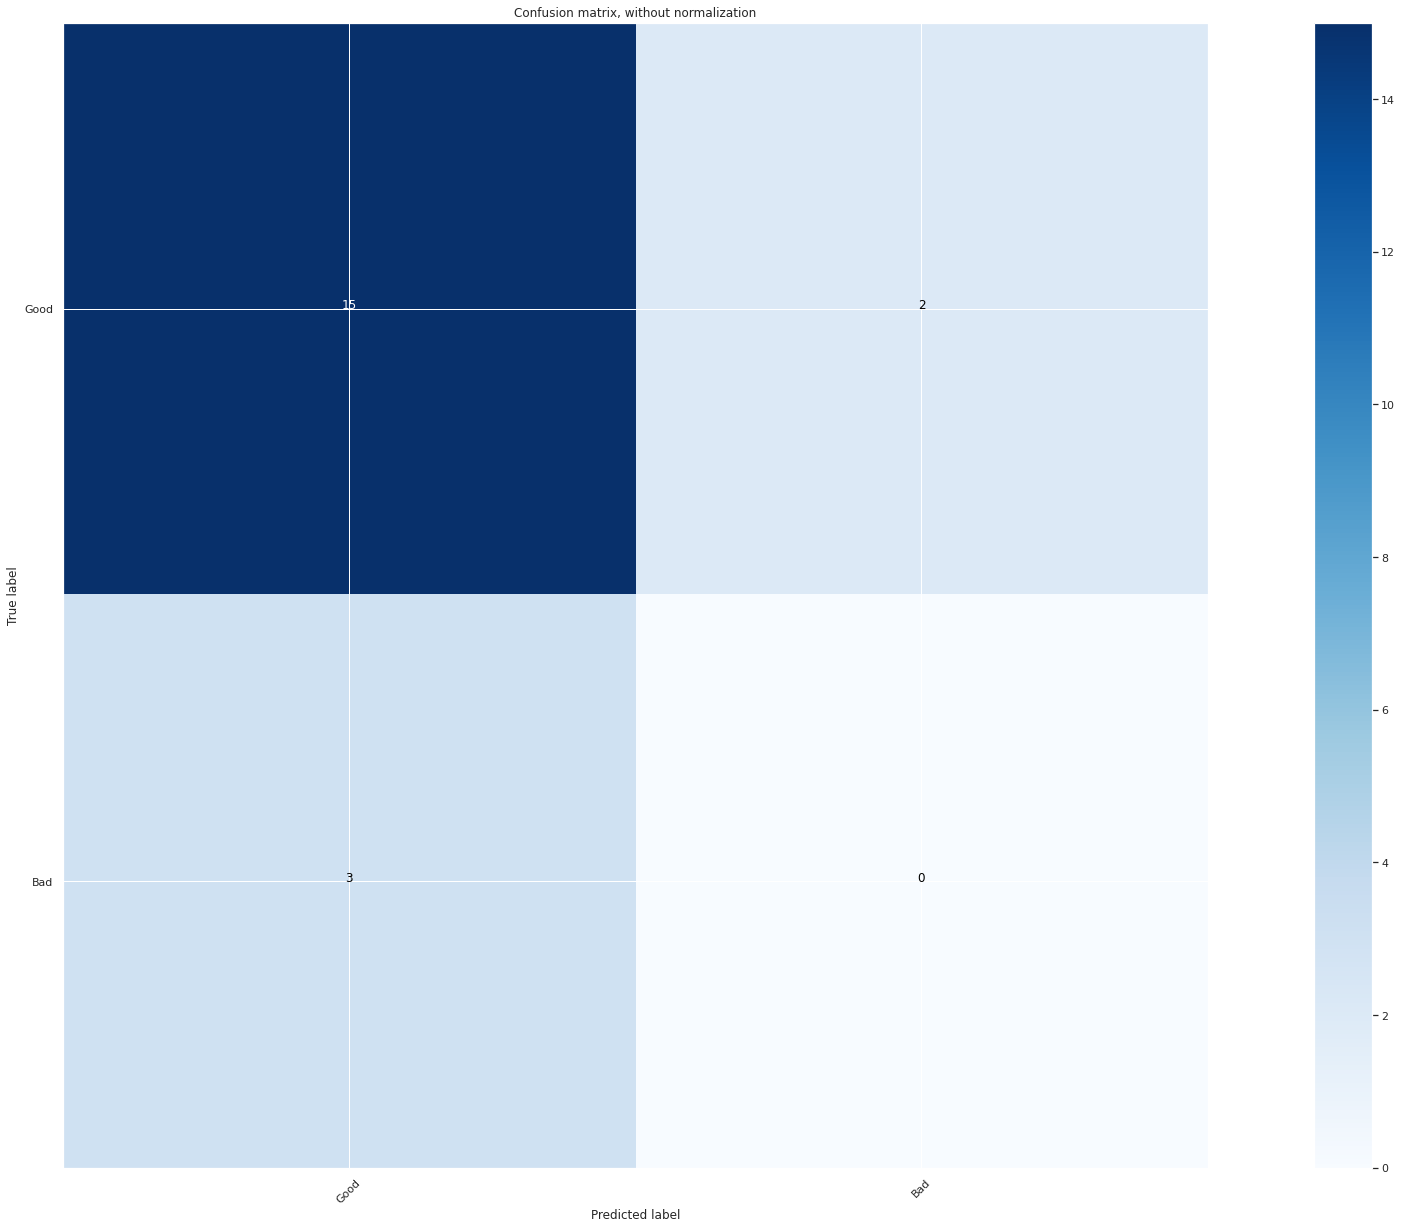

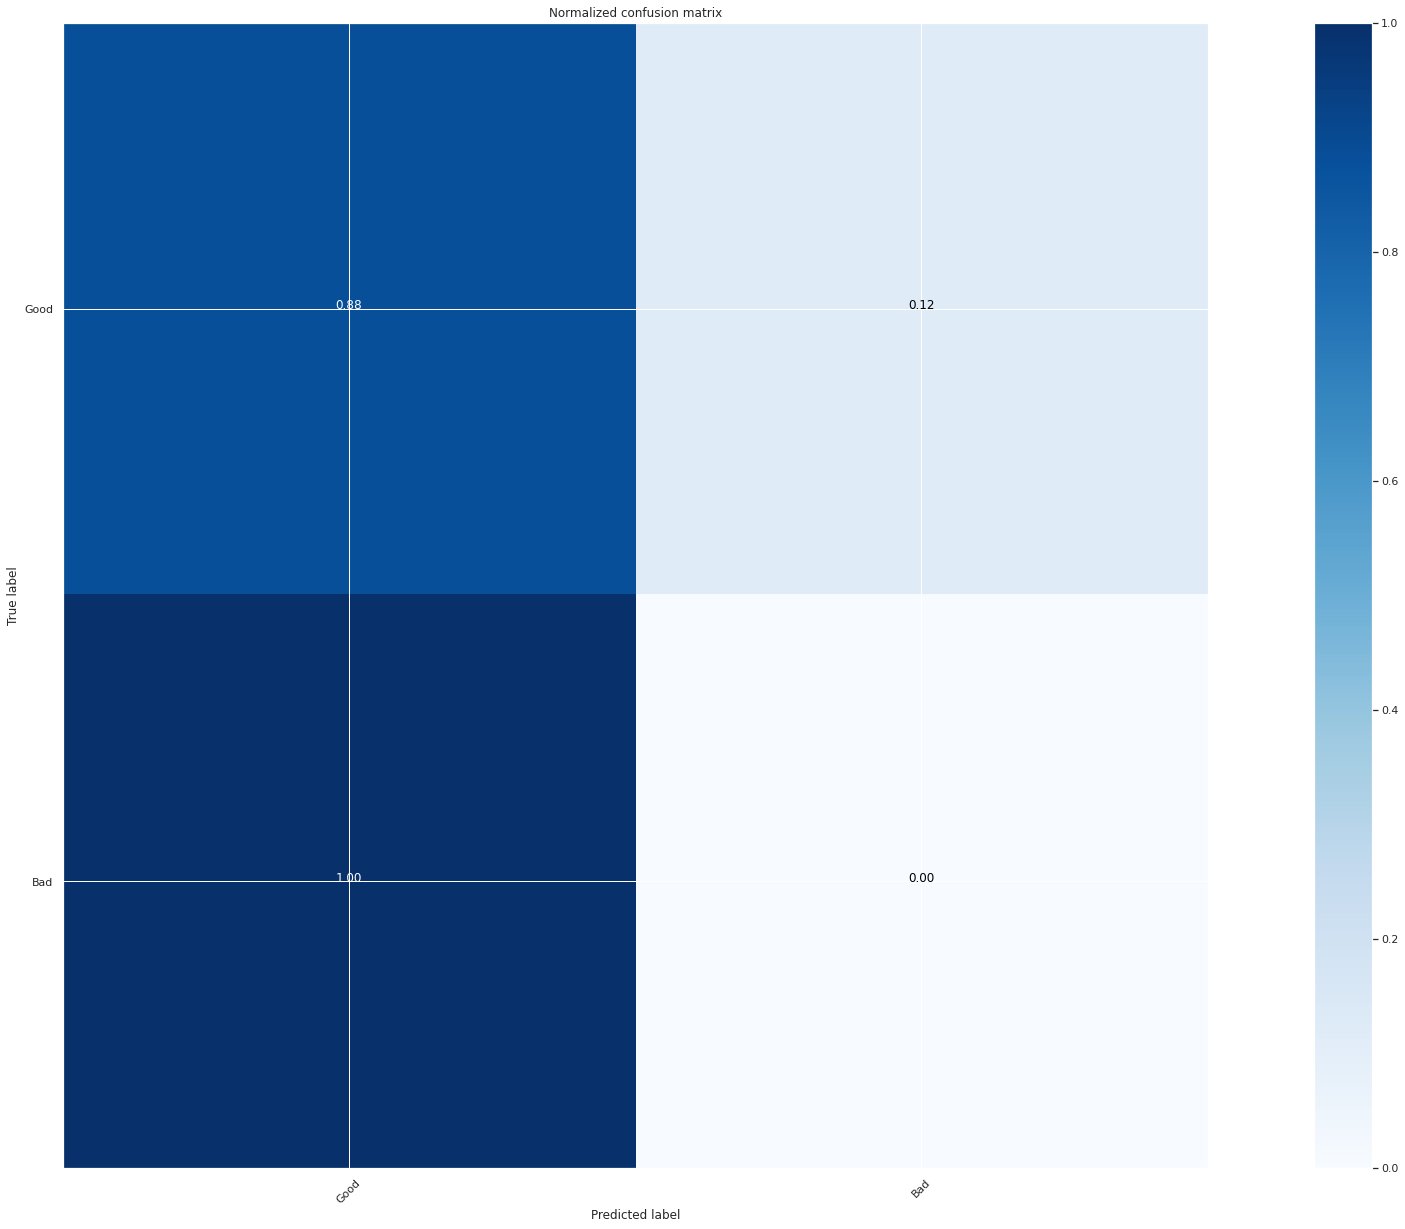

In [148]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix

class_names=["Good", "Bad"]
cnf_matrix = confusion_matrix(y_real, results)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()